In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [2]:
# Dynamic parameters
data_dir  = './data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

#Create place to save diagrams
image_dir = './data/images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

In [3]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

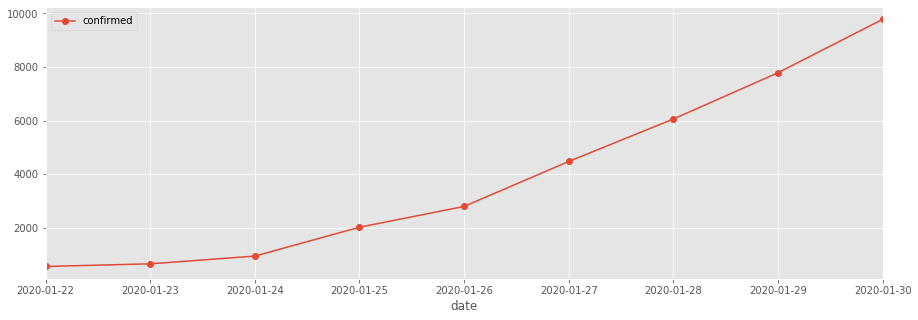

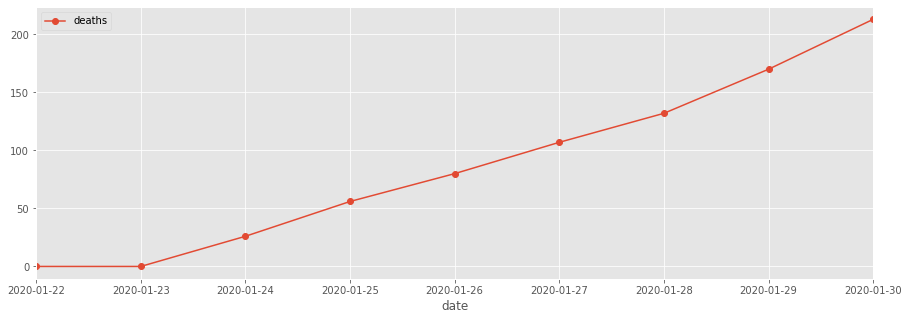

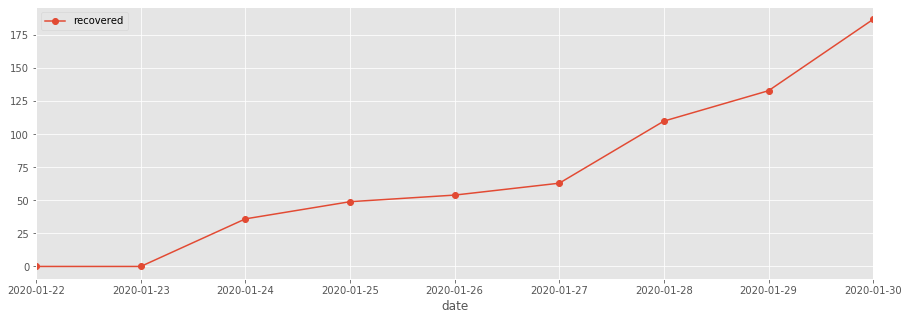

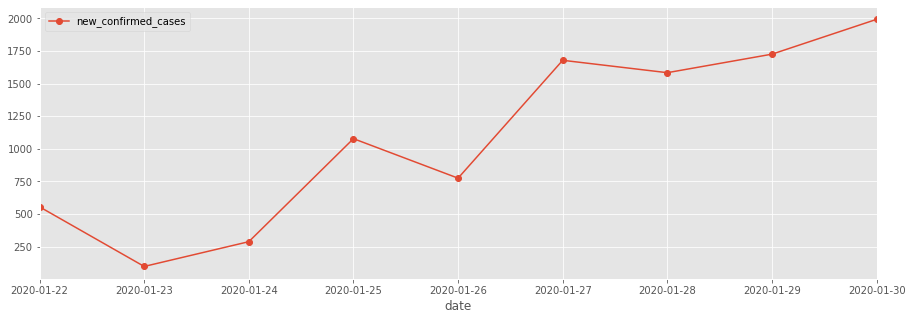

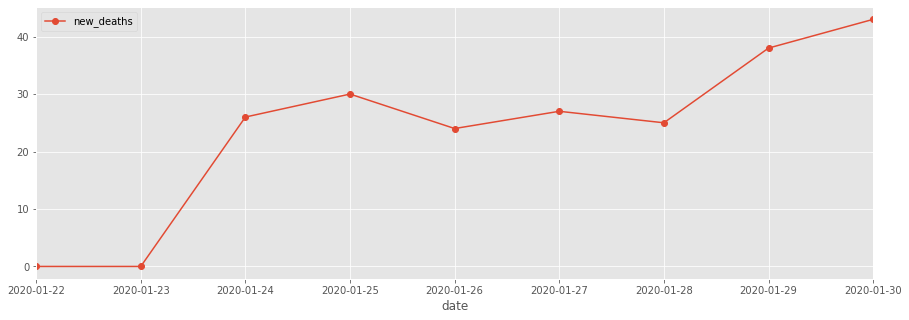

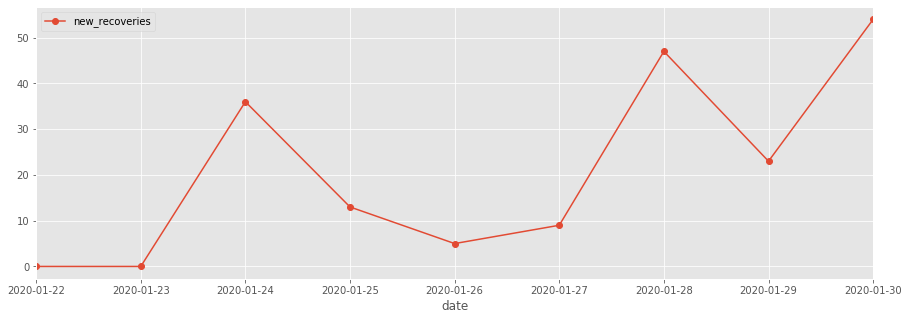

In [4]:

# Plot and save trendline graph
def create_trend_line(tmp_df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    tmp_df.groupby(['date'])[[col]].sum().plot(ax=ax, marker='o')
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))

# Time Series Data Plots
agg_cols = ['confirmed', 'deaths', 'recovered']
for col in agg_cols:
    create_trend_line(agg_df, col)

# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries']
for col in daily_figures_cols:
    create_trend_line(daily_df, col)